# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) views clusters as areas of high density separated by areas of low density (Density-Based Clustering). Due to this rather generic view, DBSCAN can find clusters of any shape, as opposed to an algorithm like K-Means, that minimizes the within-cluster sum-of-squares, which works best for convex shapes. Furthermore, DBSCAN figures out the number of clusters automatically.

## DBSCAN Theory
The central component of DBSCAN is the concept of core samples. Core Samples are data points that have at least minPts other data points within a distance of eps, which are defined as neighbors of the core sample. The fact that the core samples have at least minPts in some distance eps tells us that the core samples are in a dense area of the vector space.

A cluster is a set of core samples that can be built by recursively taking a core sample, finding all neighbors that are also core samples, and then finding their neighboring core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the edge of a cluster; therefore, they are often called border samples or border points.

Lastly, there is also a third kind of samples - noise samples or outliers. These are points that are at least eps distance from any core sample.

In the below video, you can see what the above steps look like:


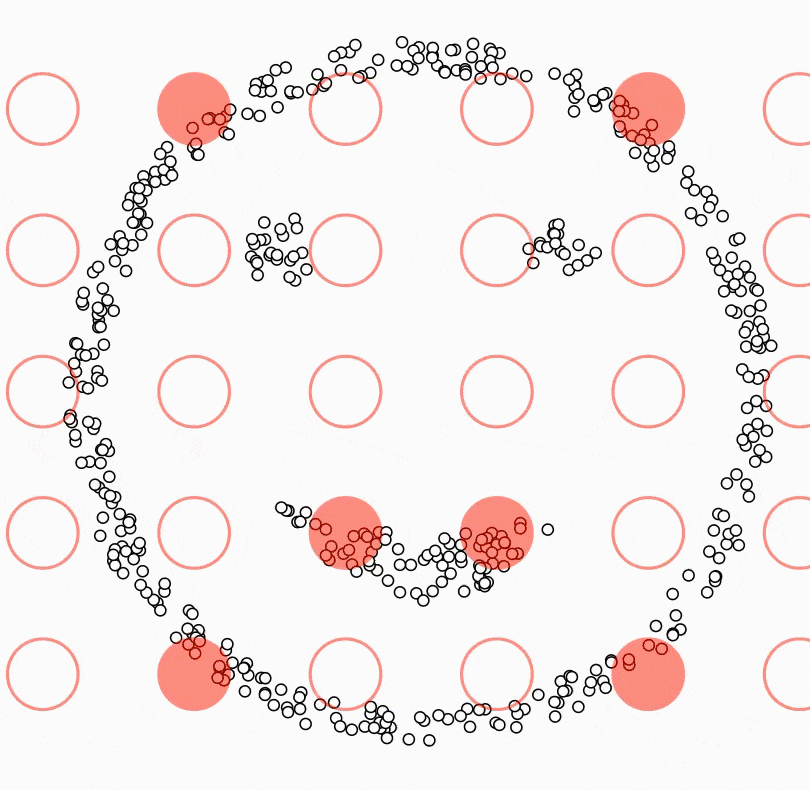

In [1]:
from IPython.display import Image 
pil_img = Image(filename='dbscan.gif.png')
display(pil_img)

What’s nice about DBSCAN is that we don’t have to specify the number of clusters to use it. All we need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions.

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

1. eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point. For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

2. minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense. If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions. All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

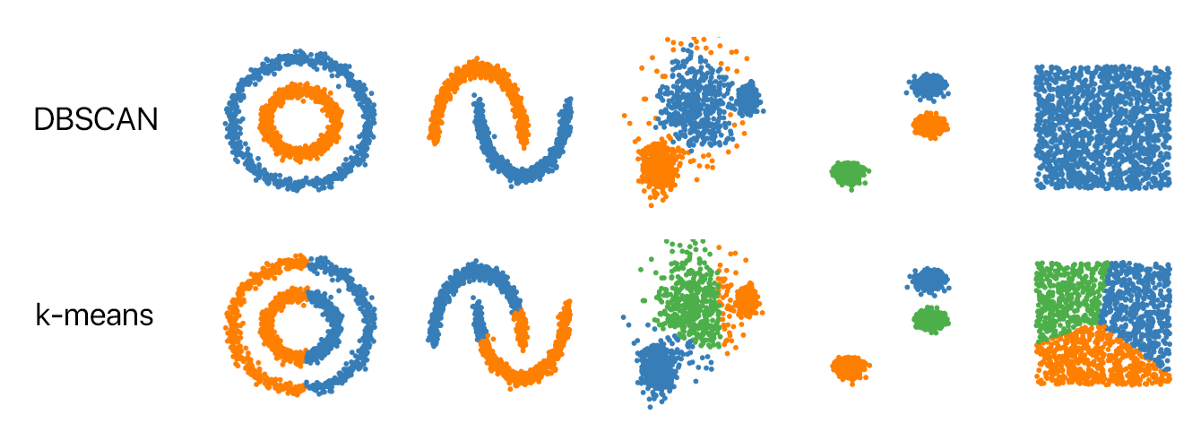

In [2]:
pil_img = Image(filename='dbscan.png')
display(pil_img)

![](k_means.gif)

## Implementation

In [2]:
# import libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
# path 
data_dict_path = './data-dictionary.csv'
country_path = './Country-data.csv'

In [4]:
# read csv files
dict_df = pd.read_csv(data_dict_path)
df = pd.read_csv(country_path)

In [5]:
# first few rows of dictionary dataset
dict_df.head()

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...

In [6]:
# first few rows of countrty dataset
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [7]:
# shape of dataset
df.shape

(167, 10)

In [8]:
#some basic info
df.info()
print(50*'-')
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory

In [9]:
#some basic statistical data
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [10]:
#null value 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
#null value
dict_df.isnull().sum()

Column Name    0
Description    0
dtype: int64

Let's see the number of unique countries present in our dataset

In [12]:
#number of unique countries
df['country'].nunique()

167

As we are going to use Unsupervised learning technique we don't need the country column here.So we are going to drop it

In [13]:
#drop country column
data=df.drop(['country'],axis=1)

In [14]:
data.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

<Axes: >

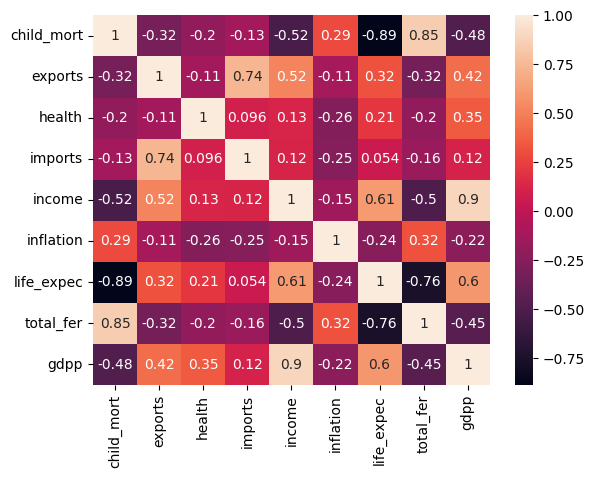

In [15]:
#correlation 
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

From above we can conclude that:<br>

1. gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated<br>
2. whereas life_expec and child_mort are highly negative correlated

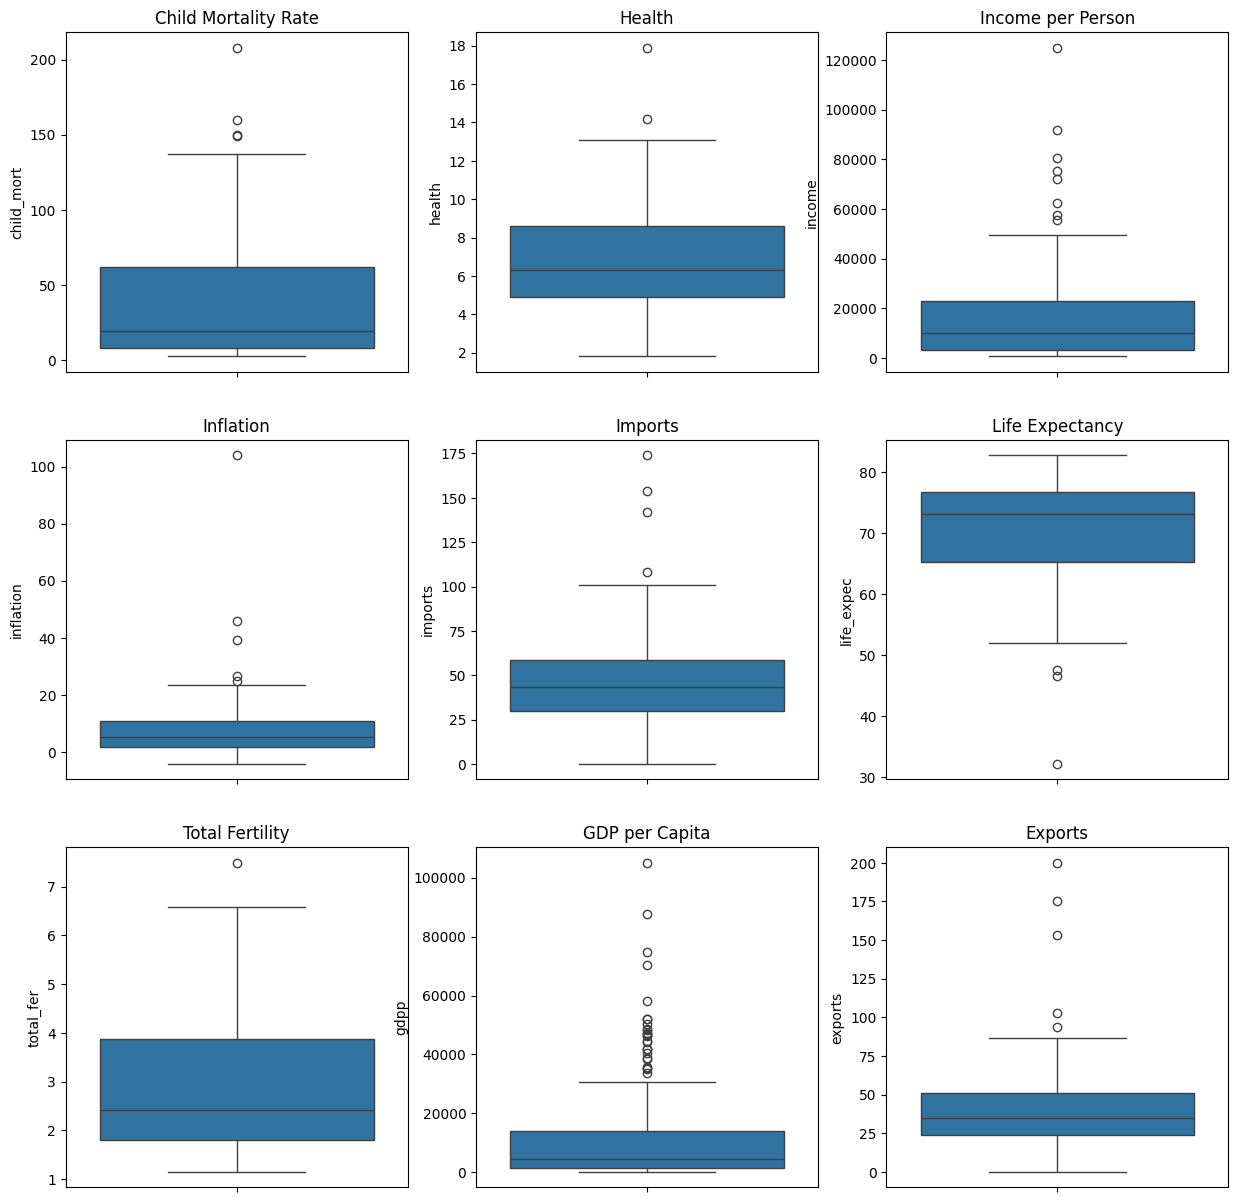

In [16]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

From above box-plots we can see that their are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.Now we can remove the outliers but we are not going to do it as our dataset is very small (167 rows only)

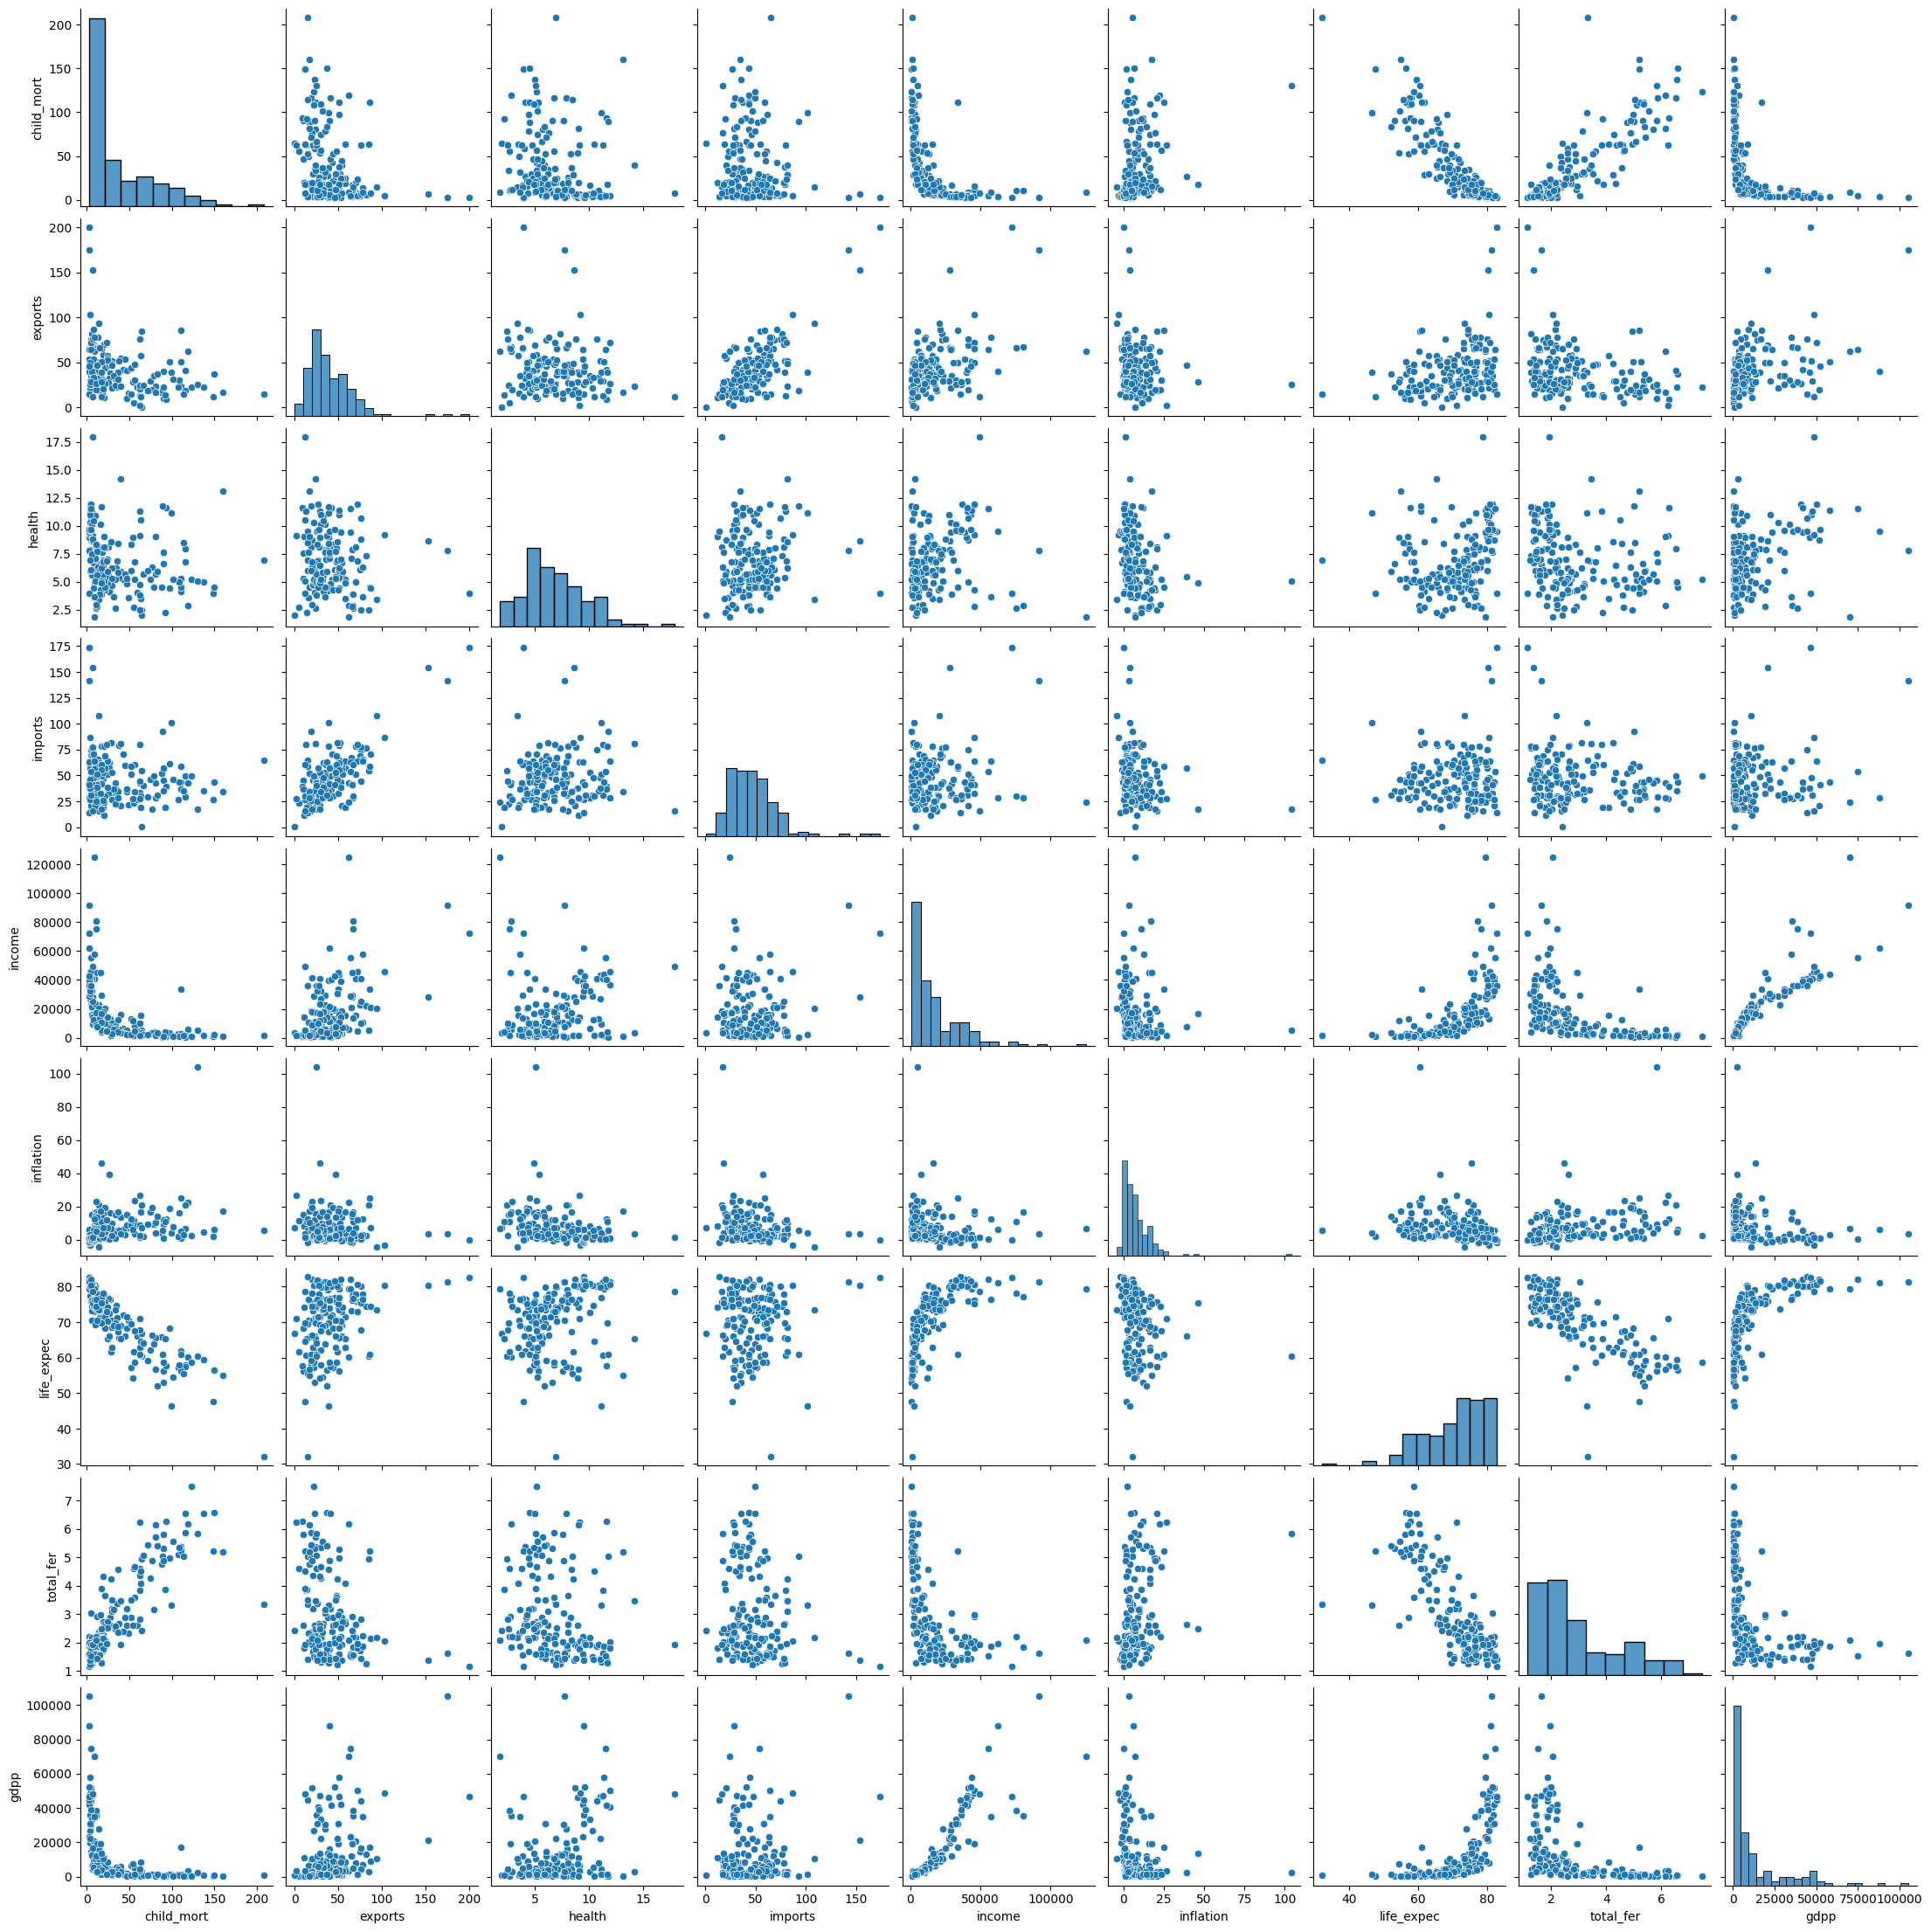

In [17]:
sns.pairplot(df)

# Scaling data

Our dataset is not scaled some values are much bigger than others,if we will not scale our data our model will not going to perform well.So now we are are going to scale our data for this we are going to use a StandardScaler library<br>
**StandardScaler** transform the data such the the mean will be 0 and variance will be 1.

**Note:-** Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

In [18]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [19]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# princt scaled dataset
scaled_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

# DBSCAN Clustering

I used only the features which have high correlation with "GDPP". I also kept "Child Mortality" and "Total Fertility" in my working dataset since they have polarizations - some data points have extremely high values, some have extremely low values.

In [38]:
from sklearn.preprocessing import StandardScaler

clustering_dataSet = data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
clustering_dataSet = np.nan_to_num(clustering_dataSet)
clustering_dataSet = np.array(clustering_dataSet, dtype=np.float64)
clustering_dataSet = StandardScaler().fit_transform(clustering_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(clustering_dataSet)
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#data['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].head())

# number of labels
print("number of labels: ", set(labels))

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
number of labels:  {0, 1, 2, 3, 4, 5, -1}


As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters 

In [22]:
# save the cluster labels and sort by cluster
datacopy = data.copy()
datacopy['DB_cluster'] = db.labels_

In [23]:
# review the cluster centers
datacopy.groupby('DB_cluster').mean()

child_mort    exports     health    imports        income  \
DB_cluster                                                              
-1           46.255556  47.222208   6.458889  50.771749  19736.819444   
 0           92.212500  27.250000   6.315000  37.637500   1793.500000   
 1           17.598305  41.357627   6.705593  48.840678  13724.237288   
 2            4.125000  33.393750  10.219375  32.775000  37312.500000   
 3          112.250000  20.025000   6.117500  32.250000   1825.000000   
 4           71.940000  22.180000   4.876000  42.260000   1824.000000   
 5          136.666667  27.266667   4.890000  42.566667   1538.000000   

            inflation  life_expec  total_fer          gdpp  
DB_cluster                                                  
-1          12.471653   68.591667   3.209861  13849.277778  
 0          10.565000   55.775000   5.535000    757.000000  
 1           4.209559   74.161017   2.082881   8358.576271  
 2           1.371125   81.006250   1.720000  41237.500000  
 3           3.143750   58.150000   5.347500    797.500000  
 4           4.180000   63.800000   4.898000    742.200000  
 5           4.436667   58.266667   6.876667    651.000000

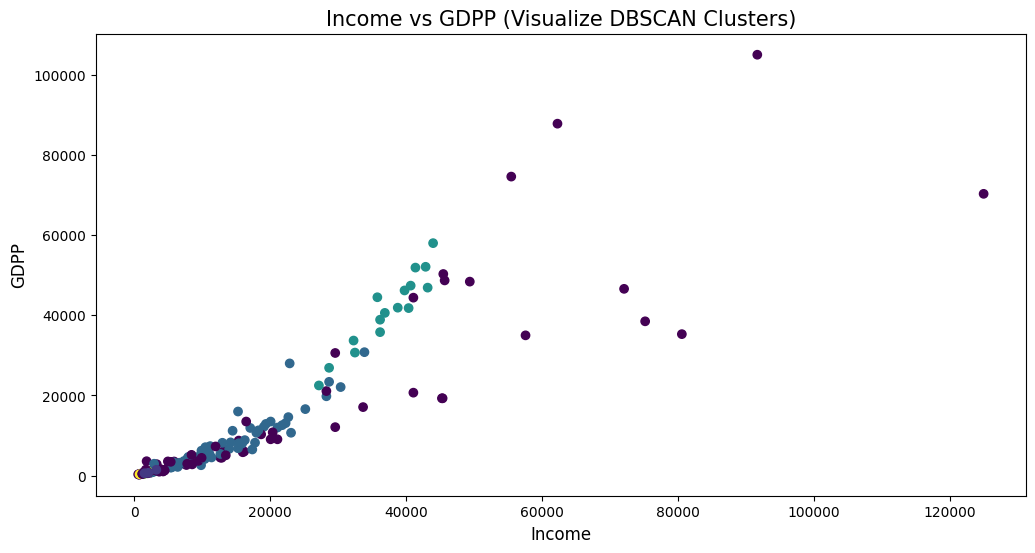

In [24]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
plt.figure(figsize=(12,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(datacopy['income'],datacopy['gdpp'],c=db.labels_) 
plt.title('Income vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

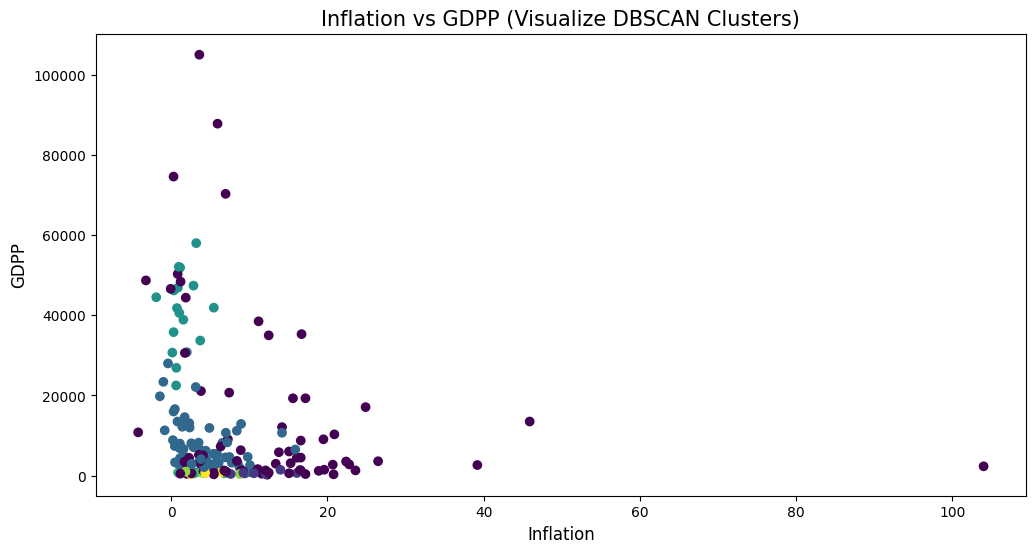

In [31]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
plt.figure(figsize=(12,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(datacopy['inflation'],datacopy['gdpp'],c=db.labels_) 
plt.title('Inflation vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

In [26]:
#Data with labelled cluster_ids
datacopy.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  DB_cluster  
0       5.82    553           0  
1       1.65   4090           1  
2       2.89   4460          -1  
3       6.16   3530          -1  
4       2.13  12200           1  
5       2.37  10300          -1  
6       1.69   3220           1  
7       1.93  51900           2  
8       1.44  46900           2  
9       1.92   5840          -1